# Example on how to plot geographical data with geopandas

First, import all the necessary modules and the data stored

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import os

%matplotlib inline

In [3]:
THIS_FOLDER = os.getcwd()

data_path = os.path.join(THIS_FOLDER, 'Data_sources/usgs_Mineral_deposits.xlsx' )

df = pd.read_excel(data_path, usecols = "B,C,E:H")

df['green_mineral'] = False

print("datafrme dimensions: ", df.shape)
print("     ")
print(df.head())

datafrme dimensions:  (997, 7)
     
      dep_name       country  latitude  longitude  commodity      dep_type  \
0       Imiter       Morocco  31.35000   -5.83360     Silver  Hydrothermal   
1     Khanguet       Algeria  35.58000    8.10000       Iron  Unclassified   
2  Bordj Redir       Algeria  35.90810    4.90610  Phosphate   Sedimentary   
3       Finsch  South Africa -28.38333   23.45000    Diamond       Igneous   
4       Ntuane  South Africa -25.21667   26.91667   Chromium       Igneous   

   green_mineral  
0          False  
1          False  
2          False  
3          False  
4          False  


## Select only the deposits that contain 'green minerals'

In doing this, I keep any deposit where the green mineral are present, no matter whether they are the main mineral extracted there or not. Pheraps, this could be changed in the future, maybe eliminating the depositis where another important mineral (e.g. gold) is the main mineral. This could be especially important to do control testing with other mineral sources.

In [5]:
green_minerals = ['Lithium', 'Nickel', 'Cobalt', 'Manganese', 'Graphite', 'REE', 
                 'Copper', 'Silicon', 'Silver', 'Aluminum']

for mineral in green_minerals:
    
    true_items = df[df['commodity'].str.contains(mineral)]
    df.loc[true_items.index, 'green_mineral'] = True
    df.loc[true_items.index, 'mineral'] = mineral

df = df[df['green_mineral'] == True]

print("dataframe points: ", df.shape)
print(" ")
print("unique deposits: ", len(df.commodity.unique()))
print(" ")
print("unique minerals: ", len(df.mineral.unique()))

df.head(10)

dataframe points:  (376, 8)
 
unique deposits:  134
 
unique minerals:  9


,dep_name,country,latitude,longitude,commodity,dep_type,green_mineral,mineral
0,Imiter,Morocco,31.3500,-5.83360,Silver,Hydrothermal,True,Silver
5,Karibib District,Namibia,-22.1500,16.00000,Lithium,Igneous,True,Lithium
6,Tema,Ghana,5.6667,-0.01670,Aluminum,Surficial,True,Aluminum
39,Bauxite,Cameroon,7.0000,13.00000,Aluminum,Surficial,True,Aluminum
40,Minim Martap,Cameroon,6.9333,12.96670,Aluminum,Surficial,True,Aluminum
41,Gebel Abu Khruq,Egypt,24.6500,34.26667,Aluminum,Surficial,True,Aluminum
42,Ranaka Quartz Vein,Botswana,-24.9250,25.41667,Silver,Hydrothermal,True,Silver
44,Nag Hammadi,Egypt,26.0667,32.21670,Aluminum,Surficial,True,Aluminum
49,Kibi Atewa,Ghana,6.1333,-0.55000,Aluminum,Surficial,True,Aluminum
50,Nyinahin (Aya),Ghana,6.6417,-2.21670,Aluminum,Surficial,True,Aluminum


In [12]:
import matplotlib
import numpy as np

cmap = matplotlib.cm.get_cmap('viridis')
color_indexer = np.linspace(0, 1, len(green_minerals))
color_list = cmap(color_indexer)
color_dict = dict(zip(green_minerals, color_list))

df['color'] = df['mineral'].map(color_dict)

Second, create a geopandas DataFrame, indicating the geographical classification based on the òatitude and longitude data present in the original database

In [7]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

print (gdf.head())

            dep_name   country  latitude  longitude commodity      dep_type  \
0             Imiter   Morocco   31.3500    -5.8336    Silver  Hydrothermal   
5   Karibib District   Namibia  -22.1500    16.0000   Lithium       Igneous   
6               Tema     Ghana    5.6667    -0.0167  Aluminum     Surficial   
39           Bauxite  Cameroon    7.0000    13.0000  Aluminum     Surficial   
40      Minim Martap  Cameroon    6.9333    12.9667  Aluminum     Surficial   

    green_mineral   mineral  \
0            True    Silver   
5            True   Lithium   
6            True  Aluminum   
39           True  Aluminum   
40           True  Aluminum   

                                                color  \
0                                [1.0, 1.0, 0.6, 1.0]   
5   [0.6509803921568628, 0.807843137254902, 0.8901...   
6   [0.6941176470588235, 0.34901960784313724, 0.15...   
39  [0.6941176470588235, 0.34901960784313724, 0.15...   
40  [0.6941176470588235, 0.34901960784313724, 0.15...

## Rawest plot of the distribution of deposits in the African continent 

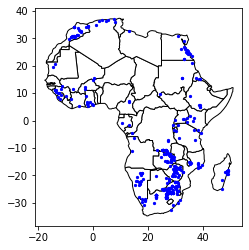

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='blue', markersize = 5)
plt.savefig("attempt.png")

plt.show()

## Now, let's move to cartopy

Import the module and start working with geopandas

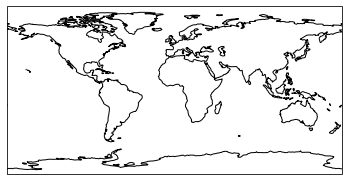

In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()

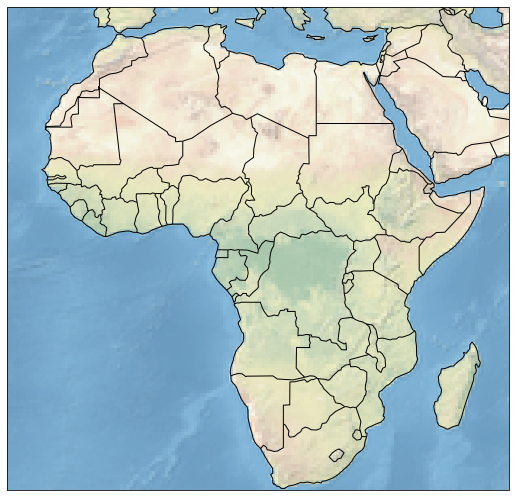

In [10]:
crs_lonlat = ccrs.PlateCarree()
extent_lonlat = [-23, 55, -35, 40]

subplot_kw = dict(projection=crs_lonlat)
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)
ax.set_extent(extent_lonlat, crs=crs_lonlat)
ax.coastlines()
ax.stock_img()
ax.add_feature(cfeature.BORDERS)

plt.show()

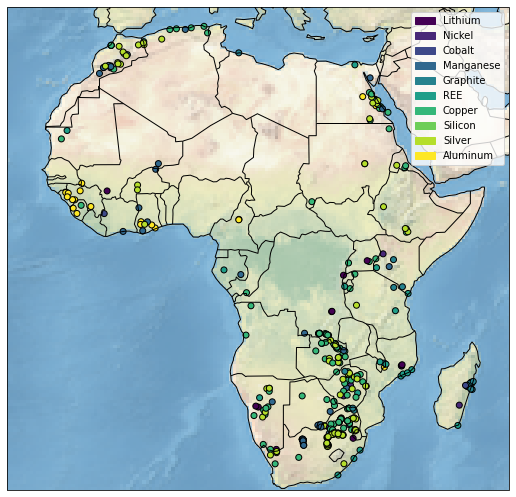

In [20]:
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)

# plot content 

ax.set_extent(extent_lonlat, crs=crs_lonlat)
ax.coastlines()
ax.stock_img()
ax.add_feature(cfeature.BORDERS)

plt.scatter(x=df.longitude, y=df.latitude,
            color=df.color, edgecolors='black',
            transform=ccrs.PlateCarree()) ## Important

# legend

import matplotlib.patches as mpatches

legend_list = []

for mineral in green_minerals:
    
    legend_list.append(mpatches.Patch(color=color_dict[mineral], label=mineral))
    
plt.legend(handles=legend_list)

plt.savefig('distribution.pdf')

plt.show()

In [94]:
df.commodity.unique()

array(['Silver', 'Iron', 'Phosphate', 'Diamond', 'Chromium', 'Lithium',
       'Aluminum', 'Barite', 'Gypsum', 'Halite', 'Limestone',
       'Limestone (marble)', 'Sodium sulfate', 'Strontium',
       'Tungsten, Tin', 'Vanadium, Lead', 'Soda ash, Halite',
       'Magnesium, Potash', 'Columbium (Niobium)',
       'Columbium (Niobium), Phosphate', 'Tin',
       'Tin, Columbium (Niobium), Tantalum',
       'Tin, Gold, Tungsten, Columbium (Niobium), Tantalum',
       'Tin, Molybdenum, Columbium (Niobium)',
       'Tin, Tungsten, Columbium (Niobium), Tantalum, Lithium, Gold)',
       'Uranium, Nickel, Cobalt, Gold, PGE, Molybdenum', 'Asbestos',
       'Columbium (Niobium), Tantalum', 'Gem', 'Limestone (dolomite)',
       'Magnesium', 'Phosphate, Fluorspar', 'Soda ash',
       'Soda ash, Sodium sulfate', 'Titanium',
       'Titanium, Iron, Zirconium', 'Titanium, REE',
       'Titanium, Zirconium', 'Bromine, Soda ash',
       'Tantalum, Columbium (Niobium)', 'Uranium', 'Fluorspar',
       'Fl

## Let's try to create a map only of copper and nickel deposits